In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

In [2]:
# load the dataset into a pandas DataFrame
df = pd.read_csv('slump_test.data', delimiter=',', index_col='No')

# define the feature variables
X = df.iloc[:, :-3]

# standardize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

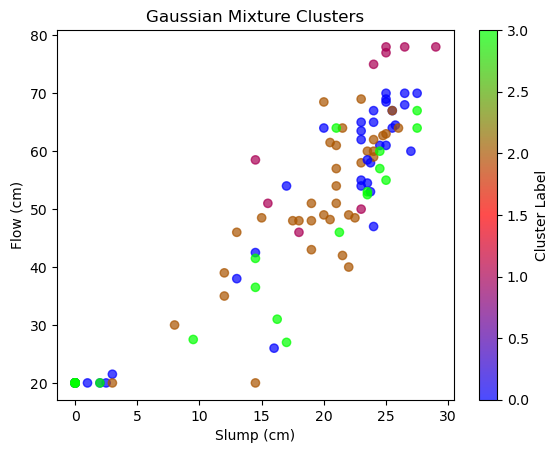

In [3]:
# initialize and fit a Gaussian Mixture model with 4 clusters to the dataset
gmm_model = GaussianMixture(n_components=4, init_params='random', covariance_type='full')
gmm_preds = gmm_model.fit_predict(X)
df['gmm_cluster'] = gmm_preds

# display the clusters for the Gaussian Mixture Model model
plt.scatter(df['SLUMP(cm)'], df['FLOW(cm)'], c=df['gmm_cluster'], cmap='brg', alpha=0.7)
plt.title("Gaussian Mixture Clusters")
plt.xlabel("Slump (cm)")
plt.ylabel("Flow (cm)")
plt.colorbar(label="Cluster Label")  # color legend
plt.show()

In [4]:
# calculate and print the AIC and BIC values
aic = gmm_model.aic(X)
bic = gmm_model.bic(X)
print(f"Akaike Information Criterion (AIC): {aic}")
print(f"Bayesian Information Criterion (BIC): {bic}")

Akaike Information Criterion (AIC): 416.7449671266283
Bayesian Information Criterion (BIC): 793.5112124434663


C:\Users\Jacob Klymenko\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


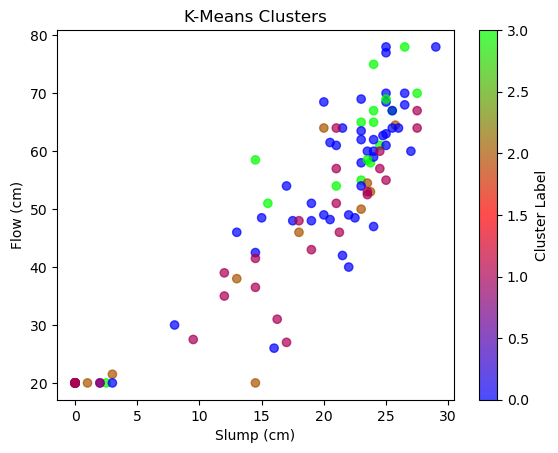

In [5]:
# initialize and fit a K-Means model with 4 clusters to the dataset
kmean_model = KMeans(n_clusters=4, random_state=4, n_init=10)
kmean_preds = kmean_model.fit_predict(X)
df['kmeans_cluster'] = kmean_preds

# display the clusters for the K-Means model
plt.scatter(df['SLUMP(cm)'], df['FLOW(cm)'], c=df['kmeans_cluster'], cmap='brg', alpha=0.7)
plt.title("K-Means Clusters")
plt.xlabel("Slump (cm)")
plt.ylabel("Flow (cm)")
plt.colorbar(label="Cluster Label")  # color legend
plt.show()

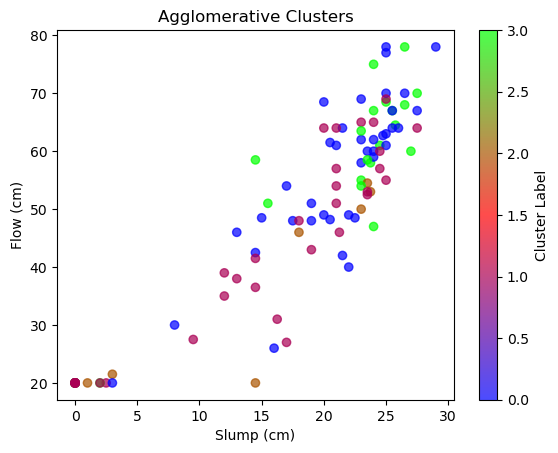

In [6]:
# initialize and fit an Agglomerative Clustering model with 4 clusters to the dataset
agg_model = AgglomerativeClustering(n_clusters=4)
agg_preds = agg_model.fit_predict(X)
df['agg_cluster'] = agg_preds

# display the clusters from the Agglomerative Clustering model
plt.scatter(df['SLUMP(cm)'], df['FLOW(cm)'], c=df['agg_cluster'], cmap='brg', alpha=0.7)
plt.title("Agglomerative Clusters")
plt.xlabel("Slump (cm)")
plt.ylabel("Flow (cm)")
plt.colorbar(label="Cluster Label")  # color legend
plt.show()

In [7]:
# print the target variables for the first 60 entries
print(df.iloc[:60, -6:-3])

# print the dataset with assigned cluster labels from three cluster techniques
print(df.iloc[:60, -3:])

    SLUMP(cm)  FLOW(cm)  Compressive Strength (28-day)(Mpa)
No                                                         
1       23.00      62.0                               34.99
2        0.00      20.0                               41.14
3        1.00      20.0                               41.81
4        3.00      21.5                               42.08
5       20.00      64.0                               26.82
6       23.00      55.0                               25.21
7        0.00      20.0                               38.86
8       14.50      58.5                               36.59
9       15.50      51.0                               32.71
10      19.00      51.0                               38.46
11      24.50      61.0                               26.02
12      23.75      58.0                               28.03
13      25.50      67.0                               31.37
14      17.00      54.0                               33.91
15      14.50      42.5                 